In [2]:
pip install imbalanced-learn

# Credit card fraud detection

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import sklearn as sk

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Check for null values
df.isnull().sum().max()

0

In [8]:
print('% of non-fraud transactions : ', round(df['Class'].value_counts()[0]/len(df) * 100,2))
print('% of fraud transactions', round(df['Class'].value_counts()[1]/len(df) * 100,2))

% of non-fraud transactions :  99.83
% of fraud transactions 0.17


###### The original dataset is highly imbalanced and cannot be used directly for classification.Using a imbalanced dataset for analysis and predictions will lead to overfitting and high variance.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

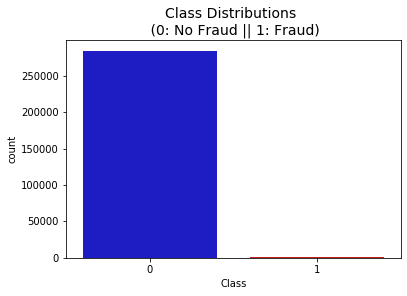

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

##### Checking the distribution of Time and Transaction amount

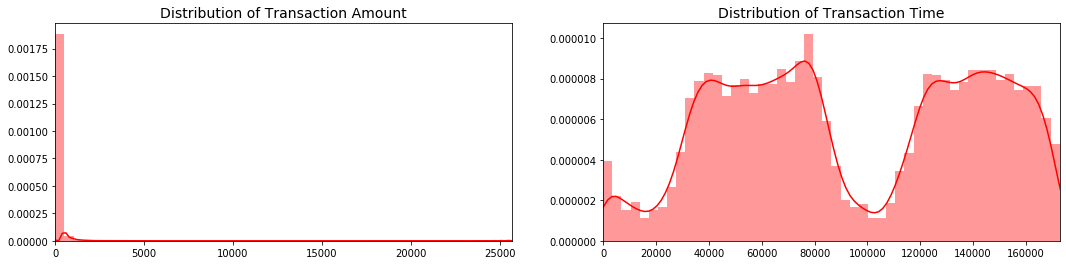

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

##### The average transaction amount is low and is around 88$.
##### The transaction time is more varied and spread.

##### Columns Time and Amount needs to be scaled to standardize the range of data and avoid outliers.

In [11]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##### Split the dataset into train and test data

In [13]:
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 30)
(71202, 30)
(213605,)
(71202,)


#### Now we will implement UnderSampling technique which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

# UnderSample majority class

## Undersampling can be defined as removing some observations of the majority class. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [15]:
#concatenate Xtrain and Ytrain
X = pd.concat([X_train, y_train], axis=1)

In [16]:
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [17]:
fraud.shape

(360, 31)

In [18]:
from sklearn.utils import resample

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])
#Shuffle the data
downsampled = downsampled.sample(frac=1, random_state=42)

In [19]:
# checking counts
downsampled

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
98111,-0.338077,-0.595747,-4.848900,3.610600,-0.283993,-2.207791,-1.255317,-0.688308,-0.081999,0.759891,...,1.587524,-0.461561,-0.288295,0.206754,0.152545,0.133912,0.643591,0.285362,-0.044378,0
106394,-0.193386,-0.523602,1.250707,-1.148838,0.401122,-2.695707,-1.441942,-0.593248,-0.797822,0.010627,...,-0.440369,-0.237953,0.029074,-0.040261,0.235312,0.494388,-0.738730,0.118529,0.025308,0
15804,-0.169038,-1.422881,-1.640589,1.106706,0.627323,0.934634,0.592832,0.551542,0.760332,-0.371678,...,0.143591,-0.086744,0.101735,-0.406760,-0.988369,0.650879,-0.063727,-0.825858,0.276481,0
157345,-0.349231,0.316398,2.070625,-0.022255,-1.475932,0.179219,0.478651,-0.326498,-0.082308,-0.165195,...,-0.285815,0.130726,0.707104,-0.031451,0.225619,0.333886,-0.482062,-0.031635,-0.069112,0
623,1.761758,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52783,0.502921,-1.035457,0.733312,-1.049512,1.107377,0.494952,-1.484658,-0.156086,-0.449269,0.107320,...,0.287322,-0.047305,-0.313003,-0.005225,0.689325,-0.085613,0.917735,-0.055734,0.051942,0
159169,-0.346113,0.368032,0.154571,1.080530,-0.401928,-0.554177,0.962757,-0.812873,1.006156,-0.136514,...,0.045498,-0.339114,-0.800178,0.082524,0.572138,-0.402522,0.112166,0.226087,0.084929,0
168465,-0.253317,0.514259,-0.944500,0.069853,-0.067113,-2.303195,0.656293,0.185310,-0.487065,0.678819,...,0.178256,0.376464,0.731694,-0.349233,-0.449769,0.132284,-0.170895,0.010985,0.028026,0
280149,-0.041818,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1


## Model Building

###### K-Fold Cross Validation on UnderSampled Data

In [20]:
X_down = downsampled.drop('Class', axis=1)
y_down = downsampled['Class']

In [21]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
}

#### Since we have undersampled, now both the classes (fraud and non-fraud) have equal data points. So we will give priority to accuracy.

In [22]:
#Using cross validation
from sklearn.model_selection import cross_validate

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
scores = ['accuracy', 'precision', 'recall', 'f1']
for key, classifier in classifiers.items():
    classifier.fit(X_down, y_down)
    training_score = cross_val_score(classifier, X_down, y_down, cv=folds)
    print("Classifiers: ", classifier.__class__.__name__, ":\n", round(training_score.mean(), 2) * 100, "% accuracy score")
                                                                
#training_score

Classifiers:  LogisticRegression :
 95.0 % accuracy score
Classifiers:  SVC :
 93.0 % accuracy score


#### Logistic Regression has higher accuracy, thus we will go ahead with Logistic Regression.

###### GridSearch to find the best parameters

In [23]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
# Logistic Regression 
log_reg_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,
                           scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 1,
                           return_train_score=True)
grid_log_reg.fit(X_down, y_down)
# We automatically get the logistic regression with the best parameters.
# log_reg = grid_log_reg.best_estimator_

# log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
# print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [24]:
cv_results = pd.DataFrame(grid_log_reg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027602,0.004924,0.003402,0.000799,0.001,{'C': 0.001},0.909722,0.902778,0.916667,0.944444,...,0.915278,0.015466,7,0.918403,0.918403,0.914931,0.907986,0.920139,0.915972,0.004337
1,0.035196,0.018891,0.003208,0.000747,0.01,{'C': 0.01},0.930556,0.951389,0.937500,0.958333,...,0.938889,0.014829,6,0.942708,0.940972,0.942708,0.940972,0.944444,0.942361,0.001299
2,0.029202,0.004537,0.003196,0.000399,0.1,{'C': 0.1},0.930556,0.958333,0.944444,0.972222,...,0.948611,0.014959,1,0.958333,0.949653,0.953125,0.946181,0.956597,0.952778,0.004447
3,0.043607,0.004591,0.002800,0.000400,1,{'C': 1},0.923611,0.951389,0.944444,0.979167,...,0.945833,0.019345,4,0.961806,0.951389,0.960069,0.947917,0.965278,0.957292,0.006551
4,0.099200,0.038864,0.003194,0.000746,10,{'C': 10},0.930556,0.951389,0.944444,0.979167,...,0.947222,0.017895,3,0.963542,0.956597,0.963542,0.956597,0.965278,0.961111,0.003740
5,0.132799,0.037797,0.004397,0.001856,100,{'C': 100},0.930556,0.951389,0.937500,0.979167,...,0.944444,0.019642,5,0.965278,0.960069,0.972222,0.958333,0.968750,0.964931,0.005197
6,0.135800,0.054601,0.003603,0.001357,1000,{'C': 1000},0.930556,0.958333,0.944444,0.986111,...,0.948611,0.022222,1,0.970486,0.960069,0.973958,0.958333,0.970486,0.966667,0.006250


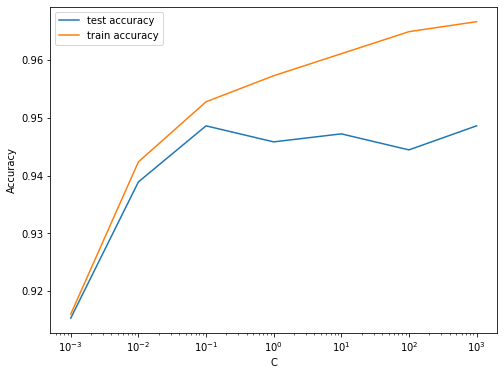

In [25]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

##### At C = 0.1, the test and train accuracy are closest to each other and is quite high. So optimal C = 0.1.

In [26]:
# model with the best value of C
model = LogisticRegression(C=0.1)

# fit
model.fit(X_down, y_down)

# predict
y_pred = model.predict(X_test)

In [27]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[69333,  1737],
       [   17,   115]], dtype=int64)

In [28]:
# metrics
# print other metrics
from sklearn import metrics
# accuracy

print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9753658605095362
precision 0.062095032397408205
recall 0.8712121212121212


In [29]:
y_pred.shape

(71202,)

In [30]:
# model with the best value of C
model_rf = RandomForestClassifier()

# fit
model_rf.fit(X_down, y_down)

# predict
y_pred_rf = model_rf.predict(X_test)

In [31]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

array([[69939,  1131],
       [   15,   117]], dtype=int64)

In [32]:
# metrics
# print other metrics
from sklearn import metrics
# accuracy

print("accuracy", metrics.accuracy_score(y_test, y_pred_rf))

# precision
print("precision", metrics.precision_score(y_test, y_pred_rf))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_rf))

accuracy 0.9839049464902672
precision 0.09375
recall 0.8863636363636364


###### Due to undersampling of the majority class, it lost a lot of information in the training data which lead to poor precision score.The Recall score is good but as per our task, it is very important to have a recall of more than 95%.Next we will try Oversampling techniques (SMOTE)

sea# Using SMOTE technique to OverSample

In [33]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 360
Before OverSampling, counts of label '0': 213245 

After OverSampling, the shape of train_X: (426490, 30)
After OverSampling, the shape of train_y: (426490,) 

After OverSampling, counts of label '1': 213245
After OverSampling, counts of label '0': 213245


In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sn.set_palette(flatui)

In [35]:
def plot_confusion_matrix(cm, classes, title, cmap):
    "plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=0)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [36]:
a = df.iloc[:, :-1]
b = df['Class']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(a)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, b, test_size=0.30, random_state=42) # Test size = 30%

In [37]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_sample(X_train, y_train)
X_train, y_train = X_res, y_res

In [38]:
LGR = LogisticRegression()
LGR.fit(X_train, y_train);

In [39]:
RDF = RandomForestClassifier(n_estimators=20)
RDF.fit(X_train, y_train);

In [40]:
modl = [('Logistic Regression', LGR), ('Random Forest Method', RDF)]
models = [md for md in modl]

In [ ]:
print()

for a,b in models:
    scores = cross_val_score(b, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, b.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, b.predict(X_train))
    classification = metrics.classification_report(y_train, b.predict(X_train))
    print('************************** {} **************************'.format(a))
    print()
    print ("Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


************************** Logistic Regression **************************

Mean Score:  86.8%

Model Accuracy:  89.9%

Confusion Matrix:
 [[180277  18731]
 [ 21613 177423]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    199008
           1       0.90      0.89      0.90    199036

    accuracy                           0.90    398044
   macro avg       0.90      0.90      0.90    398044
weighted avg       0.90      0.90      0.90    398044




In [ ]:
classnf = {'Normal':0, 'Fraud':1}
print()
print('************************** Model Test Results **************************' "\n")   

for a, b in models:
    accuracy = metrics.accuracy_score(y_test, b.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, b.predict(X_test))
    classification = metrics.classification_report(y_test, b.predict(X_test))   
    print('********** {} **********'.format(a))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Matrix Plot : ")
    plot_confusion_matrix(confusion_matrix, classes = list(classnf.keys()), title='Confusion Matrix', cmap=plt.cm.Set3)
    print() 
    print("Classification Report:" "\n", classification) 
    print()

In [ ]:
help(RandomForestClassifier)

In [ ]:
help(svm)

In [ ]:
# model with the best value of C
model_sm = svm.SVC(kernel= 'linear', random_state=0.1 ,C=0.1)

# fit
model_sm.fit(X_train, y_train)

# predict
y_pred_sm = model_sm.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_sm)

In [ ]:
# metrics
# print other metrics
from sklearn import metrics
# accuracy

print("accuracy", metrics.accuracy_score(y_test, y_pred_sm))

# precision
print("precision", metrics.precision_score(y_test, y_pred_sm))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_sm))